# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [1]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

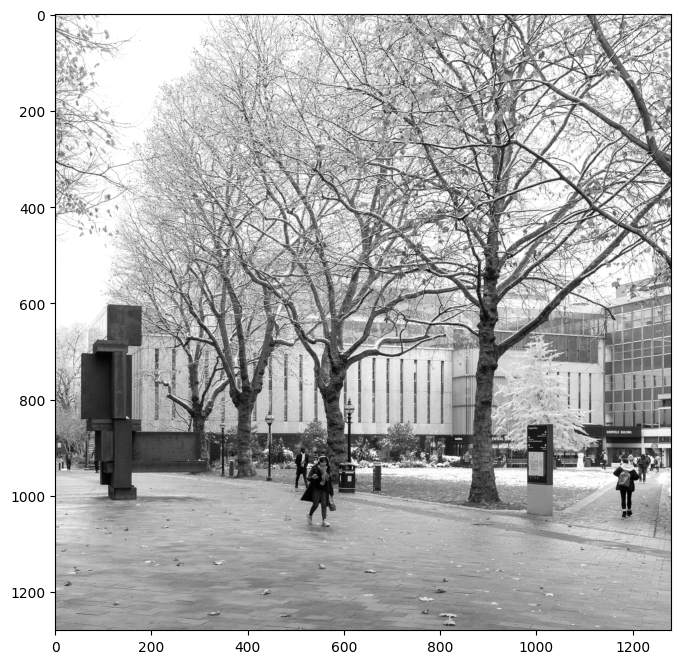

In [2]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

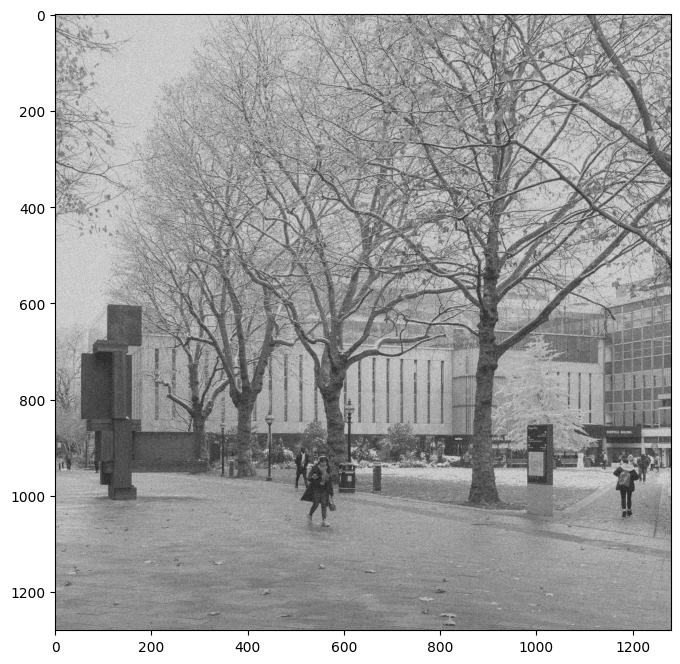

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


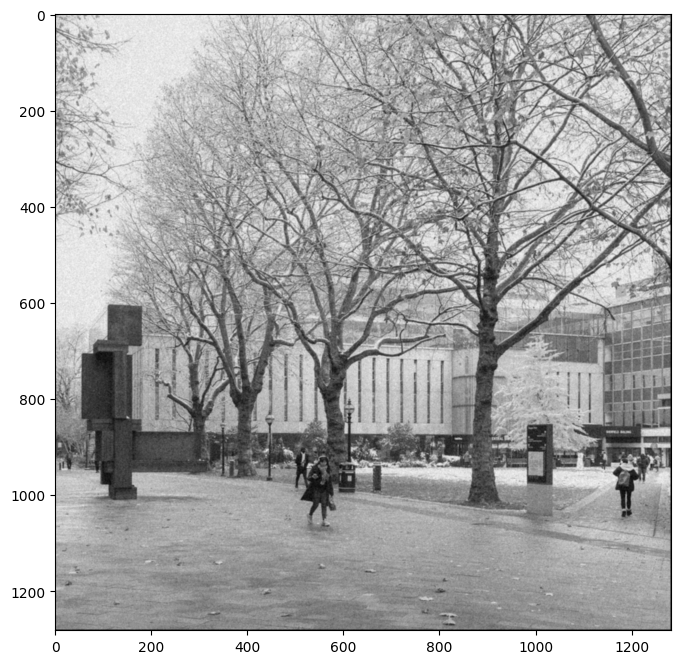

In [4]:
# Design the filter h
h = np.ones((3,3))/9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d (image_noisy, h)
# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.090

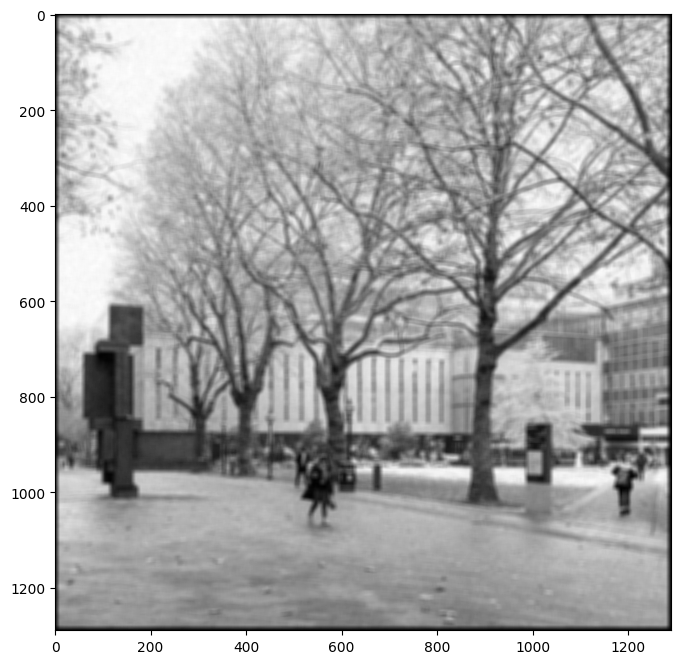

In [5]:
# Design the filter h
h = np.ones((11,11))/11

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d (image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

A bigger kernel size would result in a smoother and more blurry effect on the filtered image, as the moving average filter removes high-frequency noise.

## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


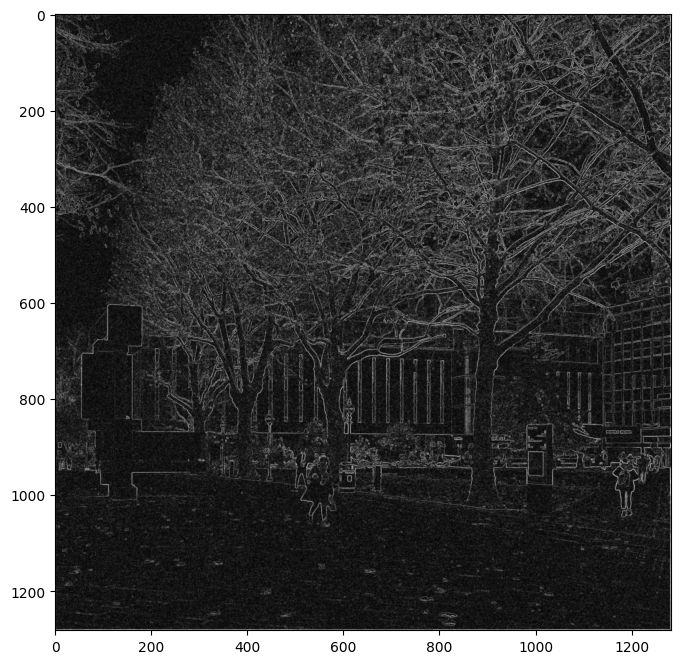

In [6]:
# Design the filters
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Image filtering
gx = scipy.signal.convolve2d (image_noisy, sobel_x)
gy = scipy.signal.convolve2d (image_noisy, sobel_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(gx ** 2 + gy ** 2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

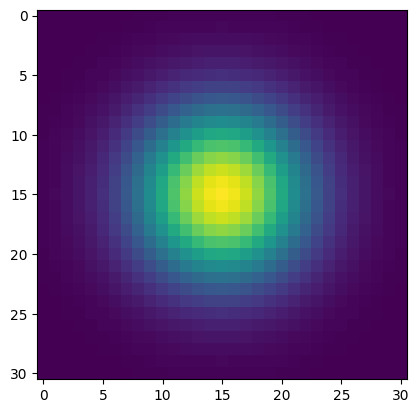

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # return: a 2D array for the Gaussian kernel
    size = 6*sigma+1
    kernel = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size): 
            kernel[i][j] = np.exp(-((i-center)**2+(j-center)**2)/(2*(sigma**2)))/(2*(np.pi)*(sigma**2)
    )
    return kernel

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Time taken for 2D Gaussian smoothing:  2.138394594192505


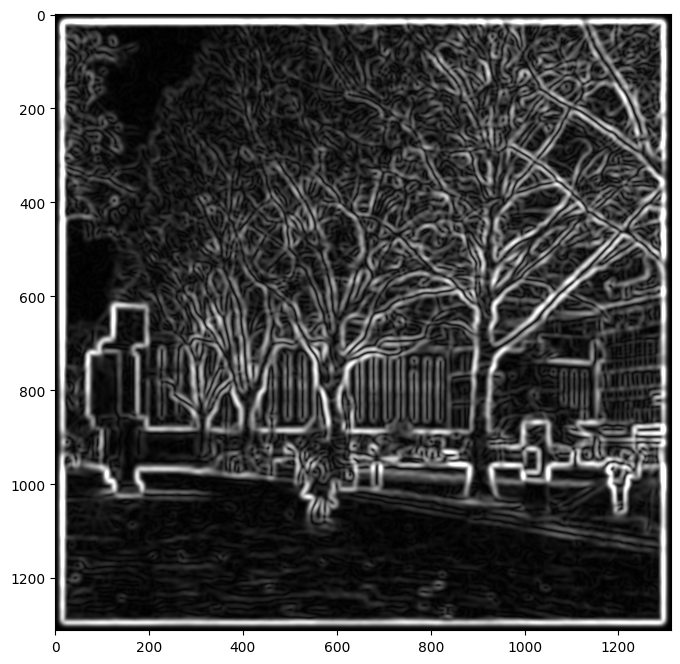

In [8]:
# Construct the Gaussian filter
sigma = 5
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h)
end = time.time()
total_time = end-start
print("Time taken for 2D Gaussian smoothing: ", total_time)

# Image filtering
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

gx = scipy.signal.convolve2d (image_smoothed, sobel_x)
gy = scipy.signal.convolve2d (image_smoothed, sobel_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(gx ** 2 + gy ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

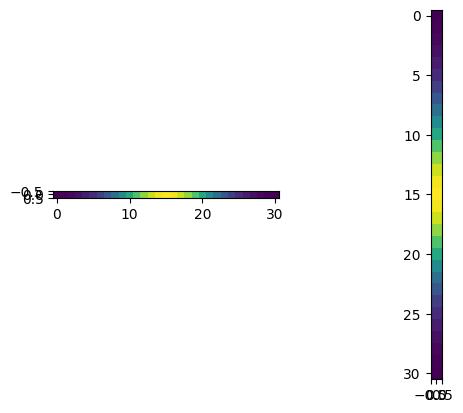

In [9]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # return: a 1D array for the Gaussian kernel
    size = 6*sigma+1
    h = np.zeros((1,size))
    center = size // 2
    for i in range(size):
        h[0][i] = np.exp(-((i-center)**2)/(2*(sigma**2)))/(np.sqrt(2*(np.pi))*sigma)
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma).reshape(-1, 1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Time taken for 1D Gaussian smoothing:  0.29569530487060547
Mean Absolute Difference: 4.0712938687900193e-13


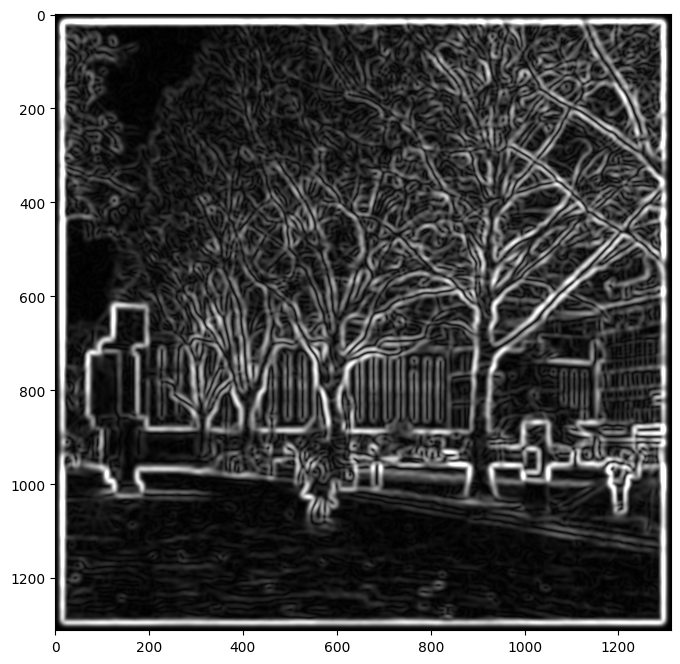

In [10]:
# Perform separable Gaussian smoothing and count time
sigma = 5

h_x = gaussian_filter_1d(sigma)
h_y = gaussian_filter_1d(sigma).reshape(-1, 1)

start = time.time()
image_smoothed2 = scipy.signal.convolve2d(scipy.signal.convolve2d(image_noisy, h_x), h_y)
end = time.time()
total_time = end-start
print("Time taken for 1D Gaussian smoothing: ", total_time)

# Image filtering
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
gx = scipy.signal.convolve2d (image_smoothed2, sobel_x)
gy = scipy.signal.convolve2d (image_smoothed2, sobel_y)

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(gx ** 2 + gy ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
mean_diff = np.mean(np.abs(grad_mag2 - grad_mag))
print("Mean Absolute Difference:", mean_diff)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

The filtering results generated using 2d Guassian and 1D Gaussian filter are very similar, as shown by the almost identical gradient magnitude images. The mean absolute difference calculated between the 2 gradient magnitudes is 4.0624839584313525e-13 which is negligible. This is because the 2D Gaussian is equivalent to convolution of the two 1D Gaussian filters with the same sigma. 

In terms of computational time it can be shown that using 1D separable Gaussian filter is much faster, taking 0.2908508777618408 seconds compared to 2.196927785873413 seconds when using 2D Gaussian filter. This is because the computational complexity of 2D Gaussian is O(N<sup>2</sup>K<sup>2</sup>) where NxN is image dimension and KxK is the kernel dimension, and for 1D Gaussian the kernel size is reduced to K, resulting in reducion in complexity of O(N<sup>2</sup>K). 

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [11]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [12]:
# Expand the dimension of the numpy array
expanded_image = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
torch_noisy_image = torch.from_numpy(expanded_image).type(torch.FloatTensor)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

31


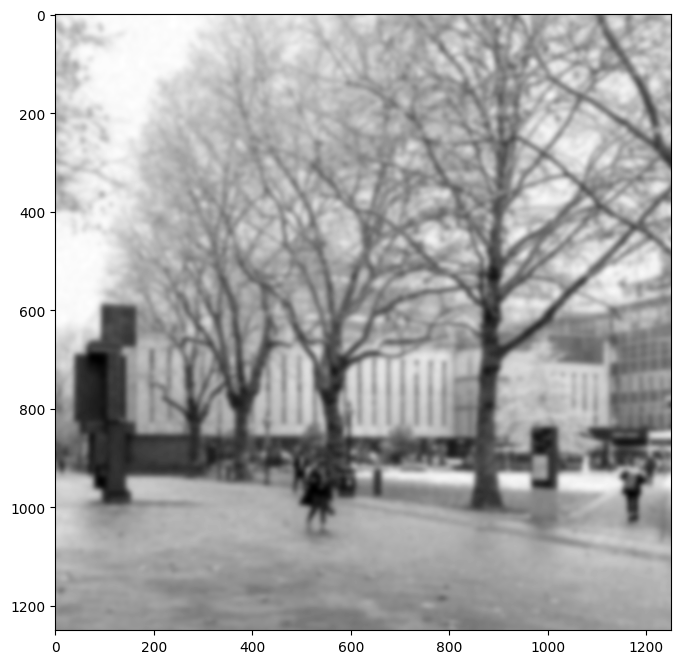

In [13]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
filter_size = len(h)
print(filter_size)

# Create the Conv2D filter
conv_filter = torch.nn.Conv2d(1, 1, kernel_size=(filter_size, filter_size))

# Filtering
conv_filter.weight.data = torch.Tensor(h).view(1, 1, filter_size, filter_size)
image_filtered_tensor = torch.nn.functional.conv2d(torch_noisy_image, conv_filter.weight)
image_filtered = image_filtered_tensor.squeeze().detach().numpy()

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

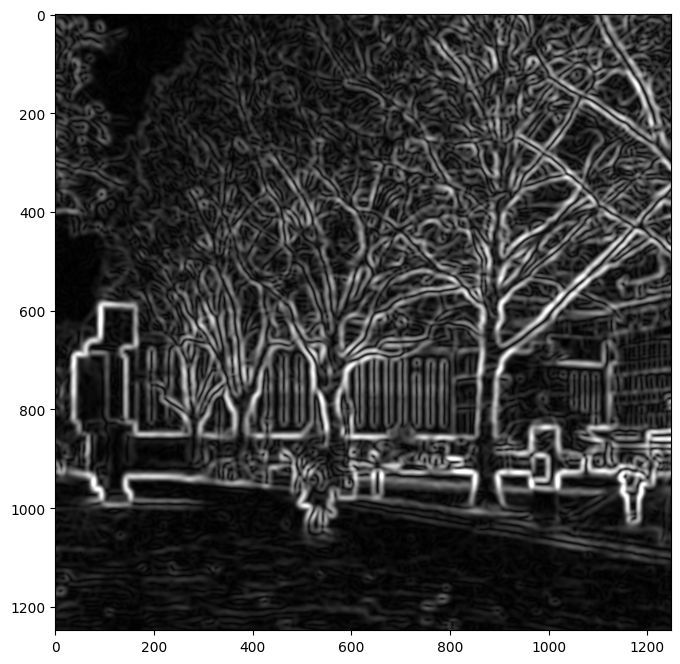

In [14]:
# Create the Conv2D filter
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
sobel_x_conv_filter = torch.nn.Conv2d(1, 1, kernel_size=(3, 3))
sobel_x_conv_filter.weight.data = torch.Tensor(sobel_x).view(1, 1, 3, 3)
sobel_y_conv_filter = torch.nn.Conv2d(1, 1, kernel_size=(3, 3))
sobel_y_conv_filter.weight.data = torch.Tensor(sobel_y).view(1, 1, 3, 3)

# Perform filtering
gx_tensor = torch.nn.functional.conv2d(image_filtered_tensor, sobel_x_conv_filter.weight)
gy_tensor = torch.nn.functional.conv2d(image_filtered_tensor, sobel_y_conv_filter.weight)
gx = gx_tensor.squeeze().detach().numpy()
gy = gy_tensor.squeeze().detach().numpy()
# Calculate the gradient magnitude map
grad_mag3 = np.sqrt(gx ** 2 + gy ** 2)

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)